In [1]:
import pandas as pd
import os
from os.path import join
from os import listdir
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import ceil

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2

from torch_predict import predict
torch.manual_seed(42)

In [2]:
project_dir = os.getcwd()
data_dir = join(project_dir, "dog-breeds-data", "images", "Images")
csv_file = join(project_dir, "dog-breeds-data", "index.csv")
tsinghua_data_dir = join(project_dir, "dog-breeds-data-2", "classes")
tsinghua_csv_file = join(project_dir, "dog-breeds-data-2", "index.csv")

df1, df2 = pd.read_csv(csv_file), pd.read_csv(tsinghua_csv_file)

In [3]:
len(df2["breed"].unique())

130

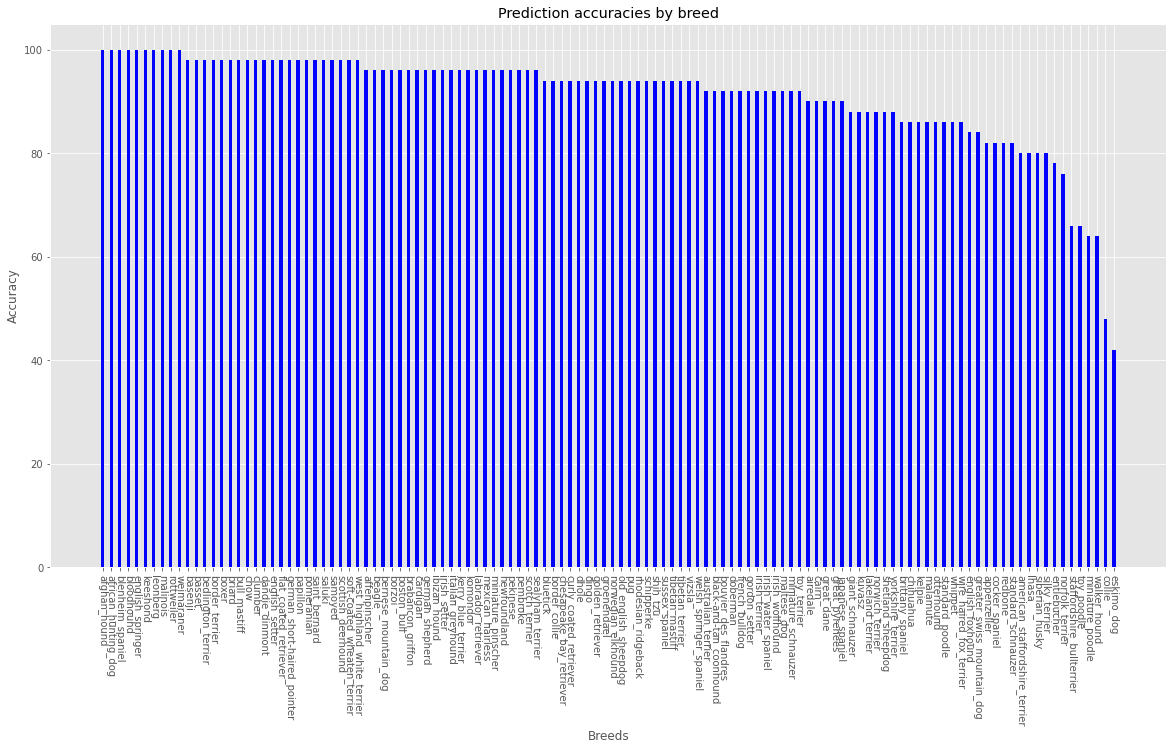

In [7]:
def predictAccuracy(breed):
    correct, total = 0, 0
    incorrect_preds = []
    paths = []

    df = df1
    df = df.loc[df["breed"] == breed]
    df_len = len(df)

    for i, row in df.iterrows():
        pred = predict(join(project_dir, row["imagePath"]))[0][0]
        if pred == row["breed"]: correct += 1
        else: 
            incorrect_preds.append((pred, row["breed"]))
            paths.append(row["imagePath"])

        total += 1

        accuracy = correct/total*100

        sys.stdout.write("\033[K")
        print(f"{total} - Accuracy for {breed}: {accuracy:.4f}", end='\r')

        if total >= 50: return incorrect_preds, paths, accuracy
    
    return incorrect_preds, paths, accuracy


all_incorrect_preds, all_paths, all_accuracies = {}, {}, {}

for breed in sorted(df1["breed"].unique()):
    all_incorrect_preds[breed], all_paths[breed], all_accuracies[breed] = predictAccuracy(breed)

l = sorted(list(all_accuracies.items()), key=lambda x: x[1], reverse=True)
x, y = zip(*l)

# creating the bar plot
fig = plt.figure(figsize = (20, 10))

plt.bar(x, y, color ='blue',
        width = 0.4)
 
plt.xlabel("Breeds")
plt.ylabel("Accuracy")
plt.xticks(rotation=270)
plt.title("Prediction accuracies by breed")
plt.show()

In [22]:
breeds = sorted(df1["breed"].unique())
print(breeds)
# for dir in listdir(join(project_dir, data_dir)):
#     if "coonhound" in dir:
#         listdir(join(project_dir, dir))

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly_coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat_coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

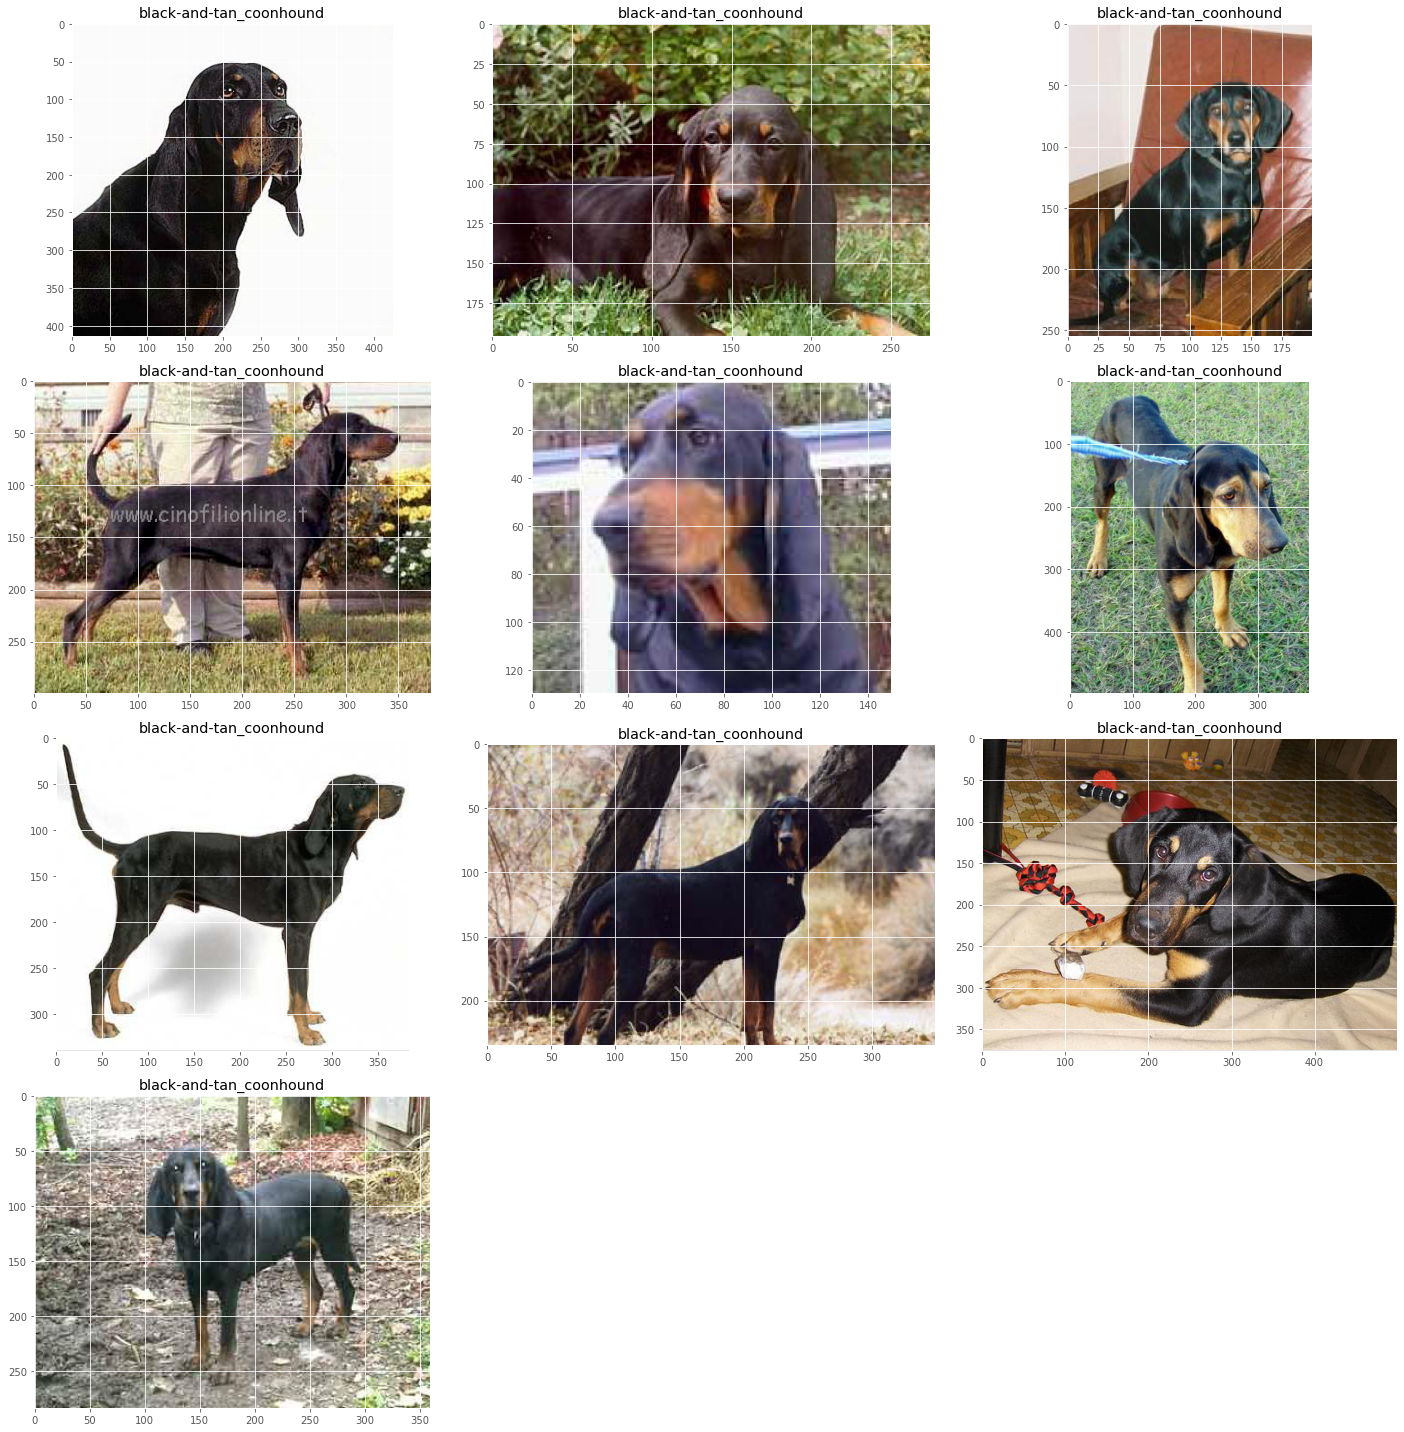

In [7]:
coonhounds = df1.loc[df1["breed"] == "black-and-tan_coonhound"]
preds, paths = [], []
count = 0
for i, row in coonhounds.iterrows():
    pred = predict(join(project_dir, row["imagePath"]))[0][0]
    preds.append(pred)
    paths.append(row["imagePath"])
    count += 1

    if count >= 10: break

cols = 3
rows = ceil(len(paths) / cols)

fig = plt.figure(figsize=(20, 20))

i = 0

for r in range(rows):
    if i == len(paths): break
    for c in range(cols):
        if i == len(paths): break
        ax = fig.add_subplot(rows, cols, i+1)
        ax.title.set_text(f"{preds[i]}")
        plt.imshow(Image.open(join(project_dir, paths[i])))
        i += 1

# for path in paths:
#     p = join(project_dir, path)
#     print(p)

plt.tight_layout()
plt.show()